In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Finding k-value using elbow method

In [30]:
from sklearn.cluster import KMeans
sse=[]
k_rng=[1,2,3,4,5,6,7,8,9,10]

In [ ]:
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
    sse.append(km.inertia_)

In [32]:
sse

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30227.606513152015,
 25062.433792653785,
 22155.14949036471,
 19657.783608703958]

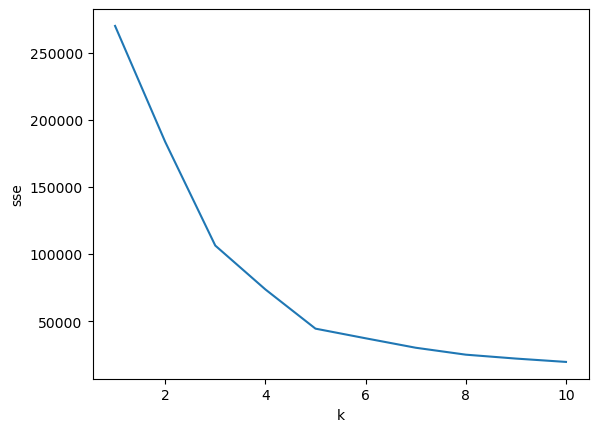

In [33]:
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(k_rng,sse)

# Training Model

In [35]:
model=KMeans(n_clusters=5)
predict=model.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])
predict

C:\Users\atk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

# Plotting Model

In [41]:
x=[]

In [42]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [43]:
x["cluster"]=predict
x

C:\Users\atk\AppData\Local\Temp\ipykernel_4252\2276959062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=predict


,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


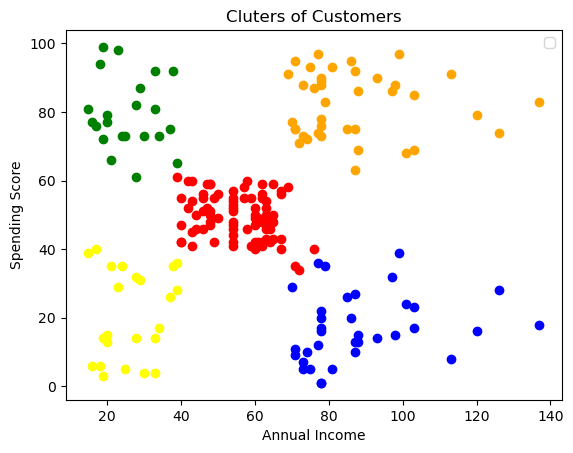

In [45]:
df1=x[x.cluster==0]
df2=x[x.cluster==1]
df3=x[x.cluster==2]
df4=x[x.cluster==3]
df5=x[x.cluster==4]
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="green")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="blue")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="red")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="orange")
plt.scatter(df5["Annual Income (k$)"],df5["Spending Score (1-100)"],color="yellow")
plt.title("Cluters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()